In [80]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate data

- https://github.com/zer0n/deepframeworks/blob/master/README.md


#### about neural nets 
- http://www.demo.cs.brandeis.edu/pr/DIBA/
- evolutionary http://www.demo.cs.brandeis.edu/


### How to make predictions with a bayesian model 
- https://www.youtube.com/watch?v=N4XpUocvz5E

In [81]:
import generate_data
import matplotlib.pyplot as plt
import numpy as np
import theano 
import theano.tensor as T

X, Y = generate_data.generate_1dlinear_data()

In [82]:
X.shape

(500,)

In [83]:
Y.shape

(500,)

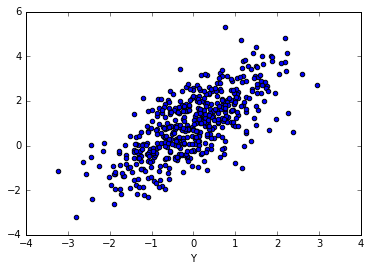

In [84]:
%matplotlib inline

plt.scatter(X, Y)
plt.xlabel("X")
plt.xlabel("Y")

## Learn using a line

In [85]:
import pymc3
from pymc3.distributions import  Normal, HalfNormal
from pymc3 import Model

In [86]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=1)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta*X
    
    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

Applied log-transform to sigma and added transformed sigma_log_ to model.


In [87]:
import pprint

In [88]:
from scipy import optimize

# Point estimate of the parameters
MAP = pymc3.find_MAP(model=basic_model, fmin=optimize.fmin_powell)

pprint.pprint(MAP)

{'alpha': array(0.9598645297781615),
 'beta': array([ 1.00952184]),
 'sigma_log_': array(-0.0016729835529033423)}


In [89]:
def model_prediction(X, alpha, beta):
    return  alpha + beta * X

In [90]:
## plot model
X_grid = np.linspace(-4, 4, 200)

In [91]:
predictions = model_prediction(X_grid, MAP["alpha"],MAP["beta"])

In [92]:
predictions.shape

(200,)

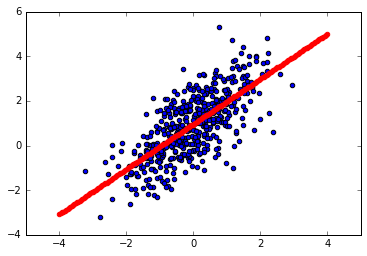

In [93]:
%matplotlib inline

## plot data
plt.scatter(X, Y)

# crate grid for the predictions
x1_grid = np.linspace(-4, 4, 200)

# Write 
plt.scatter(x1_grid,
            predictions,
            color="r")


### 1) Bayesian inference regression line


In [96]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta*X
    
    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

Applied log-transform to sigma and added transformed sigma_log_ to model.


In [97]:
with Model() as model:
      
    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10)
    sigma = HalfNormal('sigma', sd=1)
    
    # Expected value of outcome
    mu = alpha + beta*X

    # Define likelihood
    likelihood = pymc3.Normal('y', 
                              mu= mu,
                              sd=sigma, 
                              observed=Y)
       
    # Inference!
    start = pymc3.find_MAP() # Find starting value by optimization
    step = pymc3.NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = pymc3.sample(2000, step, start=start, progressbar=True) # draw 2000 posterior samples using NUTS sampling

Applied log-transform to sigma and added transformed sigma_log_ to model.
 [-----------------100%-----------------] 2000 of 2000 complete in 2.3 sec

In [98]:
start

{'alpha': array(0.9598645287172723),
 'beta': array(1.0095219371504889),
 'sigma_log_': array(-0.0016784430569460995)}

In [99]:
print(trace["alpha"].shape)
print(trace["beta"].shape)
print(trace["sigma_log_"].shape)

(2000,)
(2000,)
(2000,)


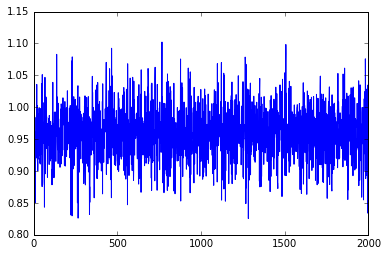

In [100]:
plt.plot(trace["alpha"])

In [101]:
trace["alpha"]

array([ 0.9658951 ,  0.9658951 ,  0.95399463, ...,  1.03484758,
        1.02847471,  0.87666261])

In [102]:
def model_prediction(X, alpha, beta):
    return  alpha + beta * X

In [103]:
## plot model
X_grid = np.linspace(-4, 4, 200)

In [104]:
mean_alpha = trace["alpha"].mean()
mean_beta = trace["beta"].mean()

std_alpha = trace["alpha"].std()
std_beta = trace["beta"].std()


In [105]:
upper_predictions =   model_prediction(X_grid, 
                                     mean_alpha + 3*std_alpha,
                                     mean_beta + 3*std_beta )

In [106]:
lower_predictions = model_prediction(X_grid, 
                                     mean_alpha - 3*std_alpha,
                                     mean_beta - 3*std_beta )

In [107]:
predictions[0:10]

array([-3.07822282, -3.03763902, -2.99705523, -2.95647144, -2.91588765,
       -2.87530385, -2.83472006, -2.79413627, -2.75355248, -2.71296868])

In [108]:
predictions_trace = model_prediction(X_grid, 
                                     mean_alpha, 
                                     mean_beta)

In [109]:
predictions_MAP = model_prediction(X_grid, 
                                   start["alpha"],
                                   start["beta"])

In [110]:
np.linalg.norm( predictions_MAP - predictions_trace)

0.012823761112103255

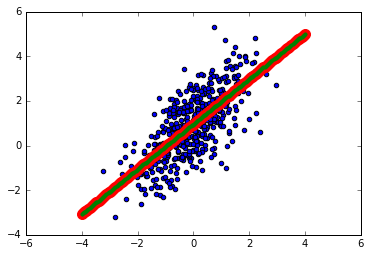

In [111]:
%matplotlib inline

## plot data
plt.scatter(X, Y)

# crate grid for the predictions
x1_grid = np.linspace(-4, 4, 200)

# Write 
plt.scatter(x1_grid,
            predictions_trace  ,
            color="r", 
            s=100)

plt.scatter(x1_grid,
            predictions_MAP  ,
            color="g",
            s=10)

### 2) Plot the results of the bayesian inference

In [112]:
trace["sigma"]

array([ 1.00620521,  1.00620521,  0.96842464, ...,  0.92975538,
        0.95301678,  1.02799629])

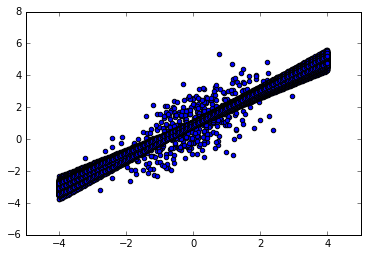

In [113]:
%matplotlib inline

## plot data
plt.scatter(X, Y)

# crate grid for the predictions
x1_grid = np.linspace(-4, 4, 200)

num_models = len(trace)
for i in range(num_models):
    prediction = model_prediction(x1_grid, 
                                  trace["alpha"][i],
                                  trace["beta"][i])
    
    plt.scatter(x1_grid, prediction)

## Learning the same data using a MLP (classification version)


In [507]:
X, Y = generate_data.generate_1dlinear_data()

In [508]:
positive = Y < 3
negative = Y >= 3

In [509]:
Y_class = np.array(classes, dtype="int")

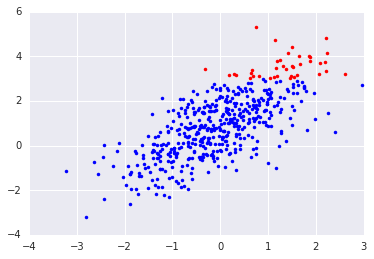

In [510]:
plt.plot(X[positive], Y[positive], ".", color="blue")
plt.plot(X[negative], Y[negative], ".", color="red")

In [511]:
X_train.shape

(500, 2)

In [512]:
sha_Y = theano.shared(Y_class.reshape((len(Y_class),1)))

In [513]:
X_train.shape

(500, 2)

In [514]:
Y_train.shape

(500,)

In [549]:
import theano
import theano.tensor as T
import pymc3
import pymc3 as pm

X_train = np.vstack((X,Y_class)).T
Y_train = Y_class

ann_input = theano.shared(X_train)
ann_output = theano.shared(Y_train)

n_hidden = 5

# Initialize random weights.
init_1 = np.random.randn(X_train.shape[1], n_hidden)
init_2 = np.random.randn(n_hidden, n_hidden)
init_out = np.random.randn(1)

with pm.Model() as neural_network:
    
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_in_1', 0, sd=1, 
                             shape=(X_train.shape[1], n_hidden), 
                             testval=init_1)
    
    # Weights from 1st to 2nd layer
    weights_1_2 = pm.Normal('w_1_2', 0, sd=1, 
                            shape=(n_hidden, n_hidden), 
                            testval=init_2)
    
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_2_out', 0, sd=1, 
                              shape=(n_hidden,), 
                              testval=init_out)
    
    # Build neural-network
    act_1 = T.tanh(T.dot(ann_input, weights_in_1))
    act_2 = T.tanh(T.dot(act_1, weights_1_2))
    act_out = T.nnet.sigmoid(T.dot(act_2, weights_2_out))
    
    out = pm.Bernoulli('out', 
                       act_out,
                       observed=ann_output)


#### Generating predictions by the learned network

In [517]:
X_train = np.array(np.vstack((X,Y)).T,"float32")

In [518]:
sym_input = T.matrix("sym_input")

# Defined shared variables of the model
sha_W1 = theano.shared(trace["w_in_1"].mean(axis=0))
sha_W2 = theano.shared(trace["w_1_2"].mean(axis=0))
sha_W3 = theano.shared(trace["w_2_out"].mean(axis=0))

act_1 = T.tanh(T.dot(sym_input, sha_W1))
act_2 = T.tanh(T.dot(act_1, sha_W2))
act_out = T.nnet.sigmoid(T.dot(act_2, sha_W3))
    
predict = theano.function([sym_input],act_out)

In [542]:
predictions = predict(X_train)

In [544]:
X.shape

(500,)

In [545]:
predictions.shape

(500,)

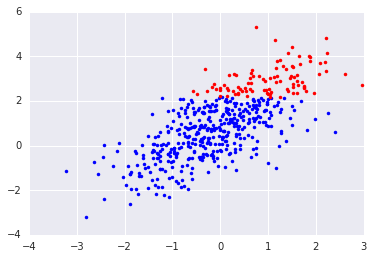

In [569]:
%matplotlib inline

threshold = 0.65
## plot data

plt.plot(X[predictions<threshold], Y[predictions<threshold], ".", color="blue")
plt.plot(X[predictions>=threshold], Y[predictions>=threshold], ".", color="red")

#### Plotting the decision boundary

- http://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot

- https://www.quora.com/How-do-I-plot-the-decision-boundary-for-a-neural-network-classifier-in-MATLAB

In [520]:
grid_2D = []

for x in np.linspace(-4,4,100):
    for y in np.linspace(-4,4,100):
        grid_2D.append((x,y))
        
grid_2D = np.array(grid_2D, dtype="float32")

In [477]:
predictions.shape

(10000,)

In [478]:
grid_2D.shape

(10000, 2)

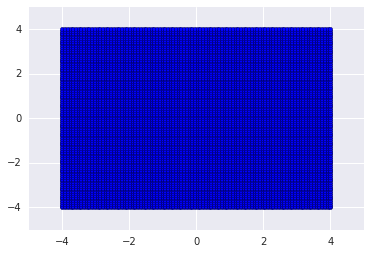

In [479]:
plt.scatter(grid_2D[:,0], grid_2D[:,1])

In [481]:
h = .02  # step size in the mesh

# create a mesh to plot in
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, h),
                               np.arange(x2_min, x2_max, h))


In [482]:
x1_grid.shape

(528, 410)

In [483]:
grid = np.array(np.c_[x1_grid.ravel(), x2_grid.ravel()], dtype="float32")

In [484]:
predictions = predict(grid )

-  Plot the decision boundary.
    - For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].

In [498]:
Z = predictions 

In [500]:
predictions > 0.5

array([False, False, False, ...,  True,  True,  True], dtype=bool)

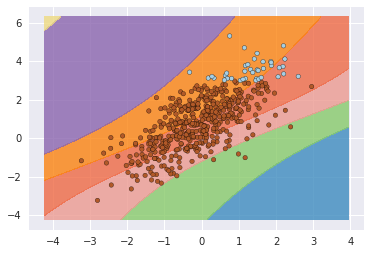

In [494]:
Z = Z.reshape(x1_grid.shape)
plt.contourf(x1_grid, x2_grid , Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_class, cmap=plt.cm.Paired)

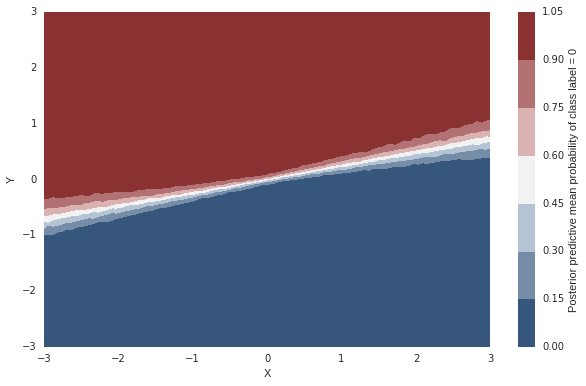

In [503]:
grid = np.mgrid[-3:3:100j,-3:3:100j]
grid_2d = grid.reshape(2, -1).T
X, Y = grid
dummy_out = np.ones(grid.shape[1], dtype=np.int8)

ann_input.set_value(grid_2d)
ann_output.set_value(dummy_out)

# Creater posterior predictive samples
ppc = pm.sample_ppc(trace, model=neural_network, samples=500)

#ax.scatter(X_train[Y_class==0, 0], X_train[(predictions>0.5), 1])
#ax.scatter(X_train[Y_class==1, 0], X_train[(predictions<0.5), 1], color='r')

import seaborn as sns

cmap = sns.diverging_palette(250, 12, s=85, l=25, as_cmap=True)
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, ppc['out'].mean(axis=0).reshape(100, 100), cmap=cmap)


cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='X', ylabel='Y');
cbar.ax.set_ylabel('Posterior predictive mean probability of class label = 0');

#### Plotting probability of the class assigned by the model

- Let us make a grid [-4,4] x [-4,4] and compute the output of te model

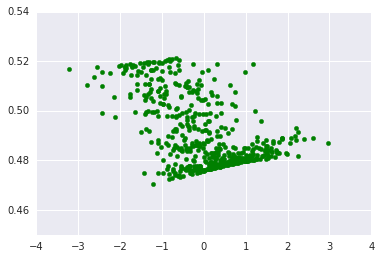

In [326]:
np.

## Learning the same data using a MLP
### variational.advi

In [147]:
np.vstack((X,Y)).T.shape

(500, 2)

In [63]:
import theano
import theano.tensor as T
import pymc3
import pymc3 as pm

X_train = np.vstack((X,Y)).T
Y_train = Y

std_val = 0.5
n_hidden = 1
input_dim = 1
output_dim = 1

ann_input = theano.shared(X_train)
ann_output = theano.shared(Y_train)

# Initialize random weights between each layer
init_w1 = np.random.randn(input_dim , n_hidden)
init_b1 = np.random.randn(n_hidden)

init_w2 = np.random.randn(n_hidden, output_dim)
init_b2 = np.random.randn(output_dim )

mlp = pymc3.Model()

with mlp:
    #######################################
    # Prior distributions over parameters #
    #######################################
    
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_0_1', 0, sd=std_val, 
                             shape=(input_dim , n_hidden), 
                             testval=init_w1)
    
    bias_in_1 =  pm.Normal('b_1', 0, sd=1, 
                           shape= (n_hidden,), 
                           testval=init_b1)
            
    # Weights from 1st to 2nd (output) layer
    weights_1_out = pm.Normal('w_1_2', 0, sd=std_val, 
                              shape=(n_hidden,1 ), 
                              testval=init_w2)
    
    bias_in_2 =  pm.Normal('b_2', 0, sd=1, 
                           shape= (output_dim,), 
                           testval=init_b2)
    
    sigma = pymc3.HalfCauchy('sigma', beta=10, testval=1.)
    
    ####################
    # Model definition #
    ####################
    
    # Expected value of outcome
    act_1 = T.nnet.relu(T.dot(ann_input, weights_in_1) + bias_in_1)
    act_out = T.dot(act_1, weights_1_out) + bias_in_2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=act_out, observed=ann_output)
    #Y_obs = Normal('Y_obs', mu=act_out, sd=sigma, observed=ann_output)

In [64]:
mlp = pymc3.Model()

with mlp:
    #######################################
    # Prior distributions over parameters #
    #######################################
    
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_0_1', 0, sd=std_val, 
                             shape=(input_dim , n_hidden), 
                             testval=init_w1)
    
    bias_in_1 =  pm.Normal('b_1', 0, sd=1, 
                           shape= (n_hidden,), 
                           testval=init_b1)
            
    # Weights from 1st to 2nd (output) layer
    weights_1_out = pm.Normal('w_1_2', 0, sd=std_val, 
                              shape=(n_hidden,1 ), 
                              testval=init_w2)
    
    bias_in_2 =  pm.Normal('b_2', 0, sd=1, 
                           shape= (output_dim,), 
                           testval=init_b2)
    
    sigma = pymc3.HalfCauchy('sigma', beta=10, testval=1.)
    
    ####################
    # Model definition #
    ####################
    
    # Expected value of outcome
    act_1 = T.nnet.relu(T.dot(ann_input, weights_in_1) + bias_in_1)
    act_out = T.dot(act_1, weights_1_out) + bias_in_2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=act_out, observed=ann_output)
    #Y_obs = Normal('Y_obs', mu=act_out, sd=sigma, observed=ann_output)

Applied log-transform to sigma and added transformed sigma_log_ to model.


#### Print initial model 

In [65]:
predictions = predict(x1_grid.reshape(len(x1_grid),1))

#### Train mlp using bayesian inference

In [79]:
with mlp:
    # Run ADVI which returns posterior means, standard deviations, and the evidence lower bound (ELBO)
    mu_params, sds_params, elbo = pymc3.variational.advi(n=20000)
    step = pm.NUTS(scaling=mlp.dict_to_array(sds_params))
    #trace = pymc3.sample(2000, step, start=mu, progressbar=True)
    trace = pm.sample(10, step, start=mu_params, progressbar=True)

Iteration 0 [0%]: ELBO = -643132.95
Iteration 2000 [10%]: Average ELBO = -651062.19
Iteration 4000 [20%]: Average ELBO = -545062.71
Iteration 6000 [30%]: Average ELBO = -505878.01
Iteration 8000 [40%]: Average ELBO = -492012.05
Iteration 10000 [50%]: Average ELBO = -486402.18
Iteration 12000 [60%]: Average ELBO = -484181.3
Iteration 14000 [70%]: Average ELBO = -483258.01
Iteration 16000 [80%]: Average ELBO = -482871.63


KeyboardInterrupt: 

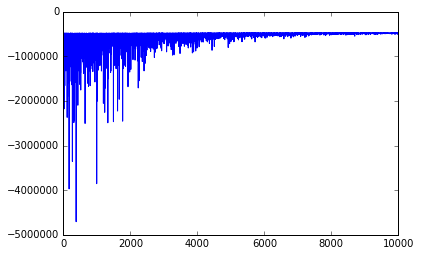

In [67]:
plt.plot(elbo)

In [68]:
trace["w_0_1"].shape

(10, 1, 1)

In [69]:
trace["w_0_1"].mean(axis=0).shape

(1, 1)

In [70]:
trace["w_0_1"].mean(axis=0)

array([[ 0.05557784]])

In [332]:
X_train = X.reshape(len(X),1)
Y_train = Y

sym_input = T.dmatrix("sym_input")

# Defined shared variables of the model
sha_W1 = theano.shared(trace["w_0_1"].mean(axis=0))
sha_b1 = theano.shared(trace["b_1"].mean(axis=0))
sha_W2 = theano.shared(trace["w_1_2"].mean(axis=0))
sha_b2 = theano.shared(trace["b_2"].mean(axis=0))

act_1 = T.nnet.relu( T.dot(sym_input, sha_W1) + sha_b1)
act_out = T.dot(act_1, sha_W2) + sha_b2

KeyError: 'w_0_1'

In [333]:
predict = theano.function([sym_input],act_out)

UnusedInputError: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 0 is not part of the computational graph needed to compute the outputs: sym_input.
To make this error into a warning, you can pass the parameter on_unused_input='warn' to theano.function. To disable it completely, use on_unused_input='ignore'.

In [334]:
x1_grid.shape

(200,)

In [335]:
predictions = predict(x1_grid.reshape(len(x1_grid),1))

ValueError: shapes (200,1) and (2,5) not aligned: 1 (dim 1) != 2 (dim 0)
Apply node that caused the error: dot(sym_input, <TensorType(float64, matrix)>)
Toposort index: 1
Inputs types: [TensorType(float32, matrix), TensorType(float64, matrix)]
Inputs shapes: [(200, 1), (2, 5)]
Inputs strides: [(4, 4), (40, 8)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[Elemwise{tanh,no_inplace}(dot.0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/home/david/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/david/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/david/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/home/david/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/david/anaconda/envs/py3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/david/anaconda/envs/py3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/david/anaconda/envs/py3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-302-06d8519f1d68>", line 8, in <module>
    act_1 = T.tanh(T.dot(sym_input, sha_W1))

Debugprint of the apply node: 
dot [id A] <TensorType(float64, matrix)> ''   
 |sym_input [id B] <TensorType(float32, matrix)>
 |<TensorType(float64, matrix)> [id C] <TensorType(float64, matrix)>

Storage map footprint:
 - sym_input, Input, Shape: (200, 1), ElemSize: 4 Byte(s), TotalSize: 800 Byte(s)
 - <TensorType(float64, matrix)>, Shared Input, Shape: (5, 5), ElemSize: 8 Byte(s), TotalSize: 200 Byte(s)
 - <TensorType(float64, matrix)>, Shared Input, Shape: (2, 5), ElemSize: 8 Byte(s), TotalSize: 80 Byte(s)
 - <TensorType(float64, vector)>, Shared Input, Shape: (5,), ElemSize: 8 Byte(s), TotalSize: 40 Byte(s)
 TotalSize: 1120 Byte(s) 0.000 GB
 TotalSize inputs: 1120 Byte(s) 0.000 GB



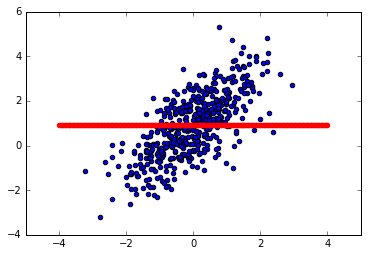

In [76]:
%matplotlib inline

## plot data
plt.scatter(X, Y)

# Write 
plt.scatter(x1_grid,
            predictions,
            color="r")

## Learning the same data using a MLP

### Using find_MAP

In [334]:
import theano
import theano.tensor as T
import pymc3
import pymc3 as pm

X_train = X.reshape(len(X),1)
Y_train = Y

ann_input = theano.shared(X_train)
ann_output = theano.shared(Y_train)

# Initialize random weights between each layer
init_w1 = np.random.randn(input_dim , n_hidden)
init_b1 = np.random.randn(n_hidden)

init_w2 = np.random.randn(n_hidden, output_dim)
init_b2 = np.random.randn(output_dim )

In [335]:
mlp = pymc3.Model()

with mlp:
    #######################################
    # Prior distributions over parameters #
    #######################################
    
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_0_1', 0, sd=std_val, 
                             shape=(input_dim , n_hidden), 
                             testval=init_w1)
    
    bias_in_1 =  pm.Normal('b_1', 0, sd=1, 
                           shape= (n_hidden,), 
                           testval=init_b1)
            
    # Weights from 1st to 2nd (output) layer
    weights_1_out = pm.Normal('w_1_2', 0, sd=std_val, 
                              shape=(n_hidden,1 ), 
                              testval=init_w2)
    
    bias_in_2 =  pm.Normal('b_2', 0, sd=1, 
                           shape= (output_dim,), 
                           testval=init_b2)
    
    sigma = pymc3.HalfCauchy('sigma', beta=10, testval=1.)
    
    ####################
    # Model definition #
    ####################
    
    # Expected value of outcome
    act_1 = T.nnet.relu(T.dot(ann_input, weights_in_1) + bias_in_1)
    act_out = T.dot(act_1, weights_1_out) + bias_in_2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=act_out, observed=ann_output )
    #Y_obs = Normal('Y_obs', mu=act_out, sd=sigma, observed=ann_output)

Applied log-transform to sigma and added transformed sigma_log_ to model.


In [336]:
with mlp:
    # Inference!
    start = pymc3.find_MAP() # Find starting value by optimization
    step = pymc3.NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = pymc3.sample(200, step, start=start, progressbar=True) # draw 2000 posterior samples using NUTS sampling

 [-----------------100%-----------------] 200 of 200 complete in 253.0 sec

In [337]:
trace

<MultiTrace: 1 chains, 200 iterations, 6 variables>

In [338]:
mu_params

{'b_1': array([-1.03698313, -1.75303267, -1.40772628]),
 'b_2': array([ 0.91755864]),
 'sigma_log_': array(1.8085192723878076),
 'w_0_1': array([[ 0.01439613,  0.00627643,  0.00135914]]),
 'w_1_2': array([[-0.00173971],
        [ 0.00359032],
        [-0.00531535]])}

In [339]:
sds_params

{'b_1': array([ 0.60789399,  0.95192213,  0.74356073]),
 'b_2': array([ 0.16392472]),
 'sigma_log_': 1.6160920845222355,
 'w_0_1': array([[ 0.18706233,  0.17145043,  0.17812802]]),
 'w_1_2': array([[ 0.22876458],
        [ 0.15125377],
        [ 0.20315062]])}

In [340]:
trace["w_1_2"].shape

(200, 3, 1)

#### Looking at the trace 

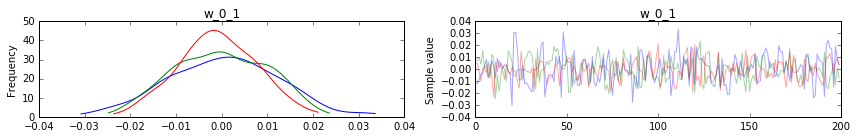

In [341]:
pm.traceplot(trace, ["w_0_1"]);

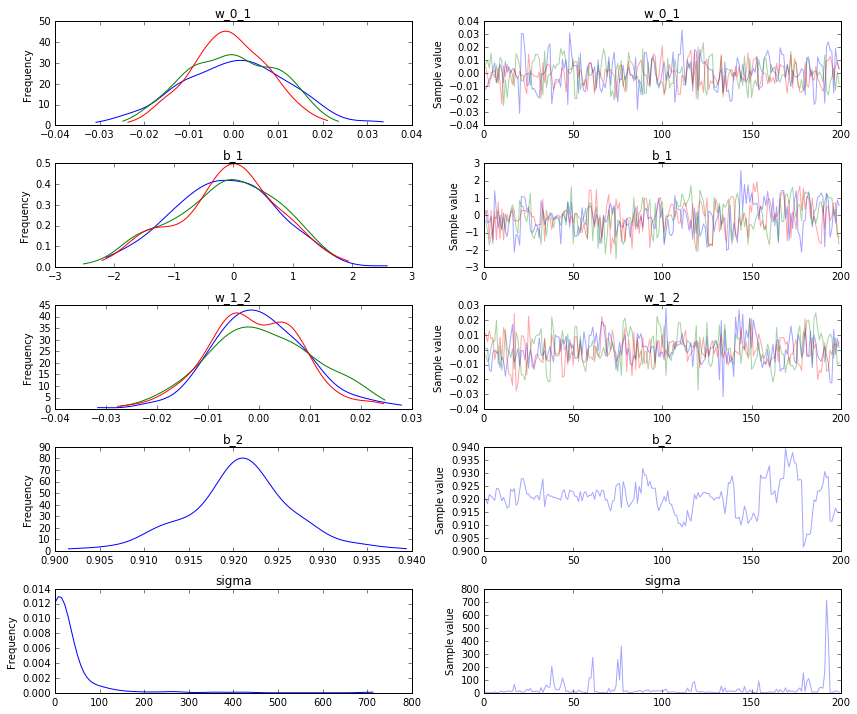

In [342]:
pm.traceplot(trace);

## solution plot

Now lets us:

- Take the learned weights and put them in the MLP object
- Make predictions using the mean value across the samples


In [343]:
trace["w_0_1"].shape

(200, 1, 3)

In [344]:
trace["w_0_1"].mean(axis=0).shape

(1, 3)

In [345]:
trace["w_0_1"].mean(axis=0)

array([[ 0.00045123, -0.00023542, -0.00087786]])

In [346]:
X_train = X.reshape(len(X),1)
Y_train = Y

sym_input = T.dmatrix("sym_input")

# Defined shared variables of the model
sha_W1 = theano.shared(trace["w_0_1"].mean(axis=0))
sha_b1 = theano.shared(trace["b_1"].mean(axis=0))
sha_W2 = theano.shared(trace["w_1_2"].mean(axis=0))
sha_b2 = theano.shared(trace["b_2"].mean(axis=0))

act_1 = T.nnet.relu( T.dot(sym_input, sha_W1) + sha_b1)
act_out = T.dot(act_1, sha_W2) + sha_b2
predict = theano.function([sym_input],act_out)

In [348]:
x1_grid.shape

(200,)

In [349]:
predictions = predict(x1_grid.reshape(len(x1_grid),1))

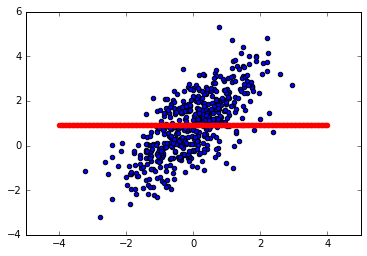

In [350]:
%matplotlib inline

## plot data
plt.scatter(X, Y)

# Write 
plt.scatter(x1_grid,
            predictions,
                color="r")

## Sinusoidal data

In [ ]:
X, Y  = generate_1dsinusoidal_data(num_samples=500, seed_val = 123)

## Modelling without mp.sample

In [ ]:
import theano
import theano.tensor as T
import pymc3
import pymc3 as pm
import numpy as np

X_train = np.vstack((X1,X2)).T
Y_train = Y

ann_input = theano.shared(X_train)
ann_output = theano.shared(Y_train)

In [ ]:
std_val = 0.01
n_hidden = 3
input_dim = 2
output_dim = 1

In [ ]:
# Initialize random weights between each layer
init_w1 = np.random.randn(input_dim , n_hidden)
init_b1 = np.random.randn(n_hidden)

init_w2 = np.random.randn(n_hidden, output_dim)
init_b2 = np.random.randn(output_dim )

In [ ]:
mlp = pymc3.Model()

with mlp:
    #######################################
    # Prior distributions over parameters #
    #######################################
    
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_in_1', 0, sd=std_val, 
                             shape=(input_dim , n_hidden), 
                             testval=init_w1)
    
    bias_in_1 =  pm.Normal('b_in_1', 0, sd=1, 
                           shape= (n_hidden,), 
                           testval=init_b1)
            
    # Weights from 1st to 2nd (output) layer
    weights_1_out = pm.Normal('w_1_2', 0, sd=std_val, 
                              shape=(n_hidden,1 ), 
                              testval=init_w2)
    
    bias_in_2 =  pm.Normal('b_in_2', 0, sd=1, 
                           shape= (output_dim,), 
                           testval=init_b2)
    
    sigma = pymc3.HalfCauchy('sigma', beta=10, testval=1.)
    
    ####################
    # Model definition #
    ####################
    
    # Expected value of outcome
    act_1 = T.nnet.relu(T.dot(ann_input, weights_in_1) + bias_in_1)
    act_out = T.dot(act_1, weights_1_out) + bias_in_2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=act_out, observed=ann_output )
    #Y_obs = Normal('Y_obs', mu=act_out, sd=sigma, observed=ann_output)

In [ ]:
with mlp:
    # Run ADVI which returns posterior means, standard deviations, and the evidence lower bound (ELBO)
    v_params = pm.variational.advi(n=10000)

In [ ]:
plt.plot(v_params.elbo_vals)

In [ ]:
v_params.elbo_vals.max()

In [ ]:
v_params.__dict__

In [ ]:
v_params[0]

In [ ]:
help(pm.variational)

About the evidence lower bounds

- https://benmoran.wordpress.com/2015/02/21/variational-bayes-and-the-evidence-lower-bound/

### Can't we sample? Sure but it's slow...

In [ ]:
with mlp:
    start = pymc3.find_MAP() # Find starting value by optimization
    step = pymc3.NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = pymc3.sample(100, step, start=start, progressbar=True) # draw 2000 posterior samples using NUTS sampling

## Fix parameters of the model and make predictions

### A little theano example

In [ ]:
sym_x = T.dmatrix('x')
s = 1 / (1 + T.exp(-sym_x))
logistic = theano.function([sym_x], s)

In [ ]:
logistic([[0, 1], [-1, -2]])

In [ ]:
sym_input = theano.tensor.matrix("sym_input")

np.random.seed(123)
init_w1 = np.random.randn(input_dim , n_hidden)
init_b1 = np.random.randn(n_hidden)

sha_W1 = theano.shared(init_w1)
sha_b1 = theano.shared(init_b1)

first_layer_act = T.nnet.relu(T.dot(sym_input , sha_W1 ) + sha_b1 )
acti = theano.function([sym_input],first_layer_act)

In [ ]:
acti(np.array([[23],[23]],dtype="float32"))